R^2 score: 0.9325937613490619


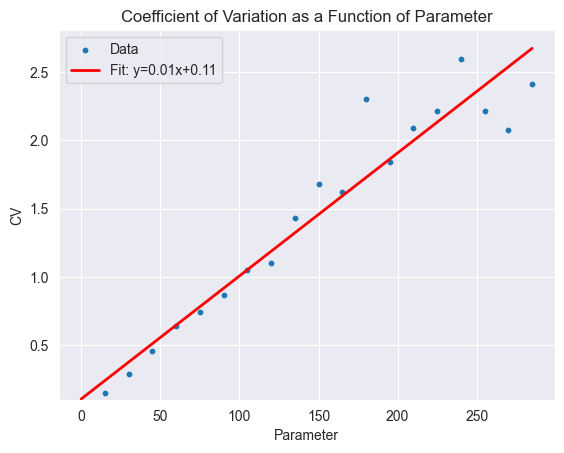

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Set parameters
mean = 100
num_samples = 300
max_param_value = 300
num_steps = 20

# Generate parameters and empty list for CVs
parameters = np.arange(0, max_param_value, max_param_value // num_steps)

cvs = []
s_data = []
# Generate data and calculate CVs
for param in parameters:
    data = np.random.normal(loc=mean, scale=param, size=num_samples).astype(int)
    # data_b = np.zeros_like(data)
    # data = np.cumsum(data)
    # data = np.sort(data)
    # data_b[0] = mean
    # data_b = data[1:] - data[:-1]
    # data= data_b
    cv = np.std(data) / np.mean(data)
    cvs.append(cv)
    s_data.append(data)

# Calculate R^2 score
slope, intercept = np.polyfit(parameters, cvs, 1)
predicted_cvs = slope * parameters + intercept
r2 = r2_score(cvs, predicted_cvs)

s_data = np.array(s_data)
# Print R^2 score
print(f'R^2 score: {r2}')

# Plot CVs
plt.ylim([0.95 * min(predicted_cvs), 1.05 * max(predicted_cvs)])
plt.scatter(parameters, cvs, s=10, label='Data')
plt.plot(parameters, predicted_cvs, color='red', linewidth=2, label=f'Fit: y={slope:.2f}x+{intercept:.2f}')
plt.title('Coefficient of Variation as a Function of Parameter')
plt.xlabel('Parameter')
plt.ylabel('CV')
plt.legend()
plt.grid(True)
plt.show()

(20, 300)


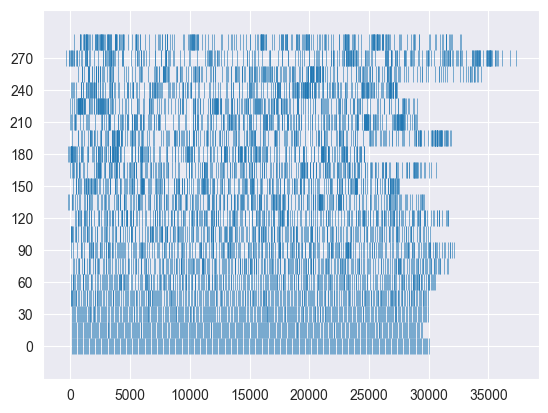

In [110]:
print(s_data.shape)
# x_scatter = np.repeat(np.arange(r_arr.shape[1])[np.newaxis,:],r_arr.shape[0],axis=0)
# np.cumsum(s_data,axis=1)
plt.eventplot(np.cumsum(s_data, axis=1),linewidths=0.4)
plt.yticks(np.arange(0, s_data.shape[0], s_data.shape[0] // 10), parameters[::s_data.shape[0] // 10].astype(int))
plt.show()
# print(data.shape)

[  83  131  203  595  490  627  697  781 1219 1160 1311 1437 1567 2016
 2079 2254 2263 2314 2453 2727 2711 3247 3289 3335 3452 3760 3833 3451
 3546 3644]
4810 -293


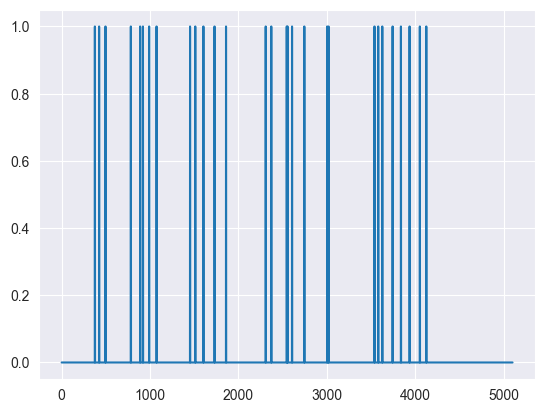

In [105]:
# p_index=np.argmin()
p_val=250
index = np.argmin(np.abs(p_val-parameters))

s_data_c=np.cumsum(s_data,axis=1)
min_val=np.min(s_data_c)
max_val=np.max(s_data_c)

template = np.zeros((max_val-min_val,))
template_pos = s_data_c[index,:]
print(template_pos)
print(max_val,min_val)
template[template_pos-min_val]=1
plt.plot(template)
plt.show()
